# Case study on Probability for Data Science
**Sreehari P S**<br>
*NORKA B5*
***

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

### Problem Statement:
To make a suitable machine learning algorithm to predict if the mushroom is edible or poisonous (e or p) using the given dataset.(Along with other ML algorithms, Naïve Bayes’ Classifier should be applied). Also, if some data pre-processing is necessary do that as well.
***

In [2]:
pd.set_option("display.max_columns", None)

In [3]:
data = pd.read_csv("./datasets/mushrooms.csv")
data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,e,e,s,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,e,c,s,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,e,e,s,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,t,e,s,s,w,w,p,w,o,e,n,a,g


In [4]:
data.shape

(8124, 23)

There are 8124 rows and 23 columns in mushroom dataset

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

All columns are of type "Object"

In [6]:
data.describe(include = "object")

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,2,5,4,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,t,b,s,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,4608,3776,5176,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [7]:
data.isna().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

No Null values are present

In [8]:
for column in data.columns:
    print(f"{column} -> {data[column].nunique()}, {data[column].unique()}")

class -> 2, ['p' 'e']
cap-shape -> 6, ['x' 'b' 's' 'f' 'k' 'c']
cap-surface -> 4, ['s' 'y' 'f' 'g']
cap-color -> 10, ['n' 'y' 'w' 'g' 'e' 'p' 'b' 'u' 'c' 'r']
bruises -> 2, ['t' 'f']
odor -> 9, ['p' 'a' 'l' 'n' 'f' 'c' 'y' 's' 'm']
gill-attachment -> 2, ['f' 'a']
gill-spacing -> 2, ['c' 'w']
gill-size -> 2, ['n' 'b']
gill-color -> 12, ['k' 'n' 'g' 'p' 'w' 'h' 'u' 'e' 'b' 'r' 'y' 'o']
stalk-shape -> 2, ['e' 't']
stalk-root -> 5, ['e' 'c' 'b' 'r' '?']
stalk-surface-above-ring -> 4, ['s' 'f' 'k' 'y']
stalk-surface-below-ring -> 4, ['s' 'f' 'y' 'k']
stalk-color-above-ring -> 9, ['w' 'g' 'p' 'n' 'b' 'e' 'o' 'c' 'y']
stalk-color-below-ring -> 9, ['w' 'p' 'g' 'b' 'n' 'e' 'y' 'o' 'c']
veil-type -> 1, ['p']
veil-color -> 4, ['w' 'n' 'o' 'y']
ring-number -> 3, ['o' 't' 'n']
ring-type -> 5, ['p' 'e' 'l' 'f' 'n']
spore-print-color -> 9, ['k' 'n' 'u' 'h' 'w' 'r' 'o' 'y' 'b']
population -> 6, ['s' 'n' 'a' 'v' 'y' 'c']
habitat -> 7, ['u' 'g' 'm' 'd' 'p' 'w' 'l']


From the above observation it is clear that column **"stalk-root"** has a missing identifier **"?"**.

In [9]:
data["stalk-root"].value_counts()

b    3776
?    2480
e    1120
c     556
r     192
Name: stalk-root, dtype: int64

There are 2480 missing values present in "stalk-root" column, so it is not good to full it median or mode. Best approach will be to make **"?"** it self as a class and consider for model.

Similarly column **"veil-type"** has only one value so it can be removed from feature set.

In [10]:
data["stalk-root"].replace(["?"], ["missing"], inplace=True)

In [11]:
data["stalk-root"].value_counts()

b          3776
missing    2480
e          1120
c           556
r           192
Name: stalk-root, dtype: int64

### Extracting features

In [12]:
data.columns

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

In [13]:
X = data.drop(columns=['class', 'veil-type'], axis = 1)
y = data['class']

In [14]:
onehot_columns = []
label_columns = []
for column in X.columns:
    label_columns.append(column) if X[column].nunique()>3 else onehot_columns.append(column)
print(f"Onehot columns = {onehot_columns}")
print(f"Label columns = {label_columns}")

Onehot columns = ['bruises', 'gill-attachment', 'gill-spacing', 'gill-size', 'stalk-shape', 'ring-number']
Label columns = ['cap-shape', 'cap-surface', 'cap-color', 'odor', 'gill-color', 'stalk-root', 'stalk-surface-above-ring', 'stalk-surface-below-ring', 'stalk-color-above-ring', 'stalk-color-below-ring', 'veil-color', 'ring-type', 'spore-print-color', 'population', 'habitat']


In [15]:
# Onehot encode
X = pd.get_dummies(data = X, columns=onehot_columns)

In [16]:
#Label encoding
from sklearn.preprocessing import LabelEncoder
for column in label_columns:
    X[column] = LabelEncoder().fit_transform(X[column])

### Split data sets

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

### Check Model Accuracy

In [18]:
# Function to check model performances
from sklearn.metrics import classification_report, confusion_matrix
def check_model_metrices(y_test, y_pred):
    print(classification_report(y_test, y_pred))
    print('Confusion Matrix = \n', confusion_matrix(y_test, y_pred))

### Build Models
***

#### 1. Multi Logistic Rregression

In [19]:
from sklearn.linear_model import LogisticRegression
rf = LogisticRegression().fit(X_train, y_train)
rf_pred = rf.predict(X_test)
check_model_metrices(y_test, rf_pred)

              precision    recall  f1-score   support

           e       0.98      0.95      0.96       843
           p       0.95      0.98      0.96       782

    accuracy                           0.96      1625
   macro avg       0.96      0.96      0.96      1625
weighted avg       0.96      0.96      0.96      1625

Confusion Matrix = 
 [[801  42]
 [ 18 764]]


#### 2. Linear SVM
***

In [20]:
from sklearn.svm import SVC
linear = SVC(kernel='linear')
linear.fit(X_train, y_train)
linear_pred = linear.predict(X_test)
check_model_metrices(y_test, linear_pred)

              precision    recall  f1-score   support

           e       0.98      0.95      0.97       843
           p       0.95      0.98      0.96       782

    accuracy                           0.96      1625
   macro avg       0.96      0.97      0.96      1625
weighted avg       0.97      0.96      0.96      1625

Confusion Matrix = 
 [[800  43]
 [ 14 768]]


#### 3. kNN Classifier
***

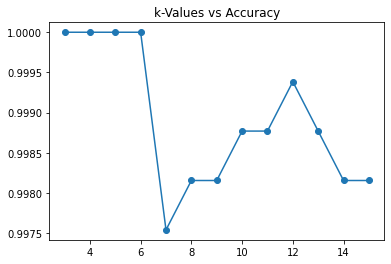

Best k value =  3
kNN classifier with k = 3 has :: 

              precision    recall  f1-score   support

           e       1.00      1.00      1.00       843
           p       1.00      1.00      1.00       782

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625

Confusion Matrix = 
 [[843   0]
 [  0 782]]


In [21]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
def generate_kNN_model(x_train, y_train, x_test, k):
    knn_model = KNeighborsClassifier(n_neighbors=k, metric='minkowski')
    knn_model.fit(x_train, y_train)
    return knn_model.predict(x_test)

# Optimizing 'k' or 'n-neighbers' value
def find_optimal_k(x_train, y_train, x_test):
    accur_dict = dict()
    for k in np.arange(3,16):
        y_pred = generate_kNN_model(x_train, y_train, x_test, k)
        accur_dict[k] = accuracy_score(y_test, y_pred)
    #Plot
    plt.plot(list(accur_dict.keys()),list(accur_dict.values()), marker ='o')
    plt.title('k-Values vs Accuracy')
    plt.show()
    optimal_k = max(accur_dict, key = lambda x: accur_dict[x])
    print('Best k value = ', optimal_k)
    return optimal_k
k_optimal = find_optimal_k(X_train, y_train, X_test)
knn_y_pred = generate_kNN_model(X_train, y_train, X_test, k_optimal)
print(f'kNN classifier with k = {k_optimal} has :: \n')
check_model_metrices(y_test, knn_y_pred)

#### 4. Decision Trees
***

In [22]:
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)
dt_pred = dt_model.predict(X_test)
check_model_metrices(y_test, linear_pred)

              precision    recall  f1-score   support

           e       0.98      0.95      0.97       843
           p       0.95      0.98      0.96       782

    accuracy                           0.96      1625
   macro avg       0.96      0.97      0.96      1625
weighted avg       0.97      0.96      0.96      1625

Confusion Matrix = 
 [[800  43]
 [ 14 768]]


#### 5. Random Forest
***

In [23]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)
check_model_metrices(y_test, linear_pred)

              precision    recall  f1-score   support

           e       0.98      0.95      0.97       843
           p       0.95      0.98      0.96       782

    accuracy                           0.96      1625
   macro avg       0.96      0.97      0.96      1625
weighted avg       0.97      0.96      0.96      1625

Confusion Matrix = 
 [[800  43]
 [ 14 768]]


#### 6. Naive Bayes Classifier
***

In [24]:
from sklearn.naive_bayes import BernoulliNB
bnb = BernoulliNB().fit(X_train, y_train)
bnb_pred = bnb.predict(X_test)
check_model_metrices(y_test, bnb_pred)

              precision    recall  f1-score   support

           e       0.89      0.95      0.92       843
           p       0.94      0.87      0.91       782

    accuracy                           0.91      1625
   macro avg       0.92      0.91      0.91      1625
weighted avg       0.91      0.91      0.91      1625

Confusion Matrix = 
 [[799  44]
 [ 98 684]]


In [25]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB().fit(X_train, y_train)
gnb_pred = gnb.predict(X_test)
check_model_metrices(y_test, gnb_pred)

              precision    recall  f1-score   support

           e       0.90      0.96      0.93       843
           p       0.95      0.88      0.92       782

    accuracy                           0.92      1625
   macro avg       0.92      0.92      0.92      1625
weighted avg       0.92      0.92      0.92      1625

Confusion Matrix = 
 [[808  35]
 [ 93 689]]


In [26]:
from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB().fit(X_train, y_train)
mnb_pred = mnb.predict(X_test)
check_model_metrices(y_test, mnb_pred)

              precision    recall  f1-score   support

           e       0.79      0.94      0.86       843
           p       0.91      0.73      0.81       782

    accuracy                           0.84      1625
   macro avg       0.85      0.83      0.83      1625
weighted avg       0.85      0.84      0.83      1625

Confusion Matrix = 
 [[790  53]
 [212 570]]


## Result
***

**kNN classifier** generated best results with 100% accuracy.

***